In [64]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

### Full alpha simu

In [9]:
w = 4.69
x_bar = 8.77
n = 100
t = w/(x_bar + 1/n)

def test_stat(xs):
    n = xs.shape[0]
    w = ((np.arange(n) + 1) * xs).sum() / (n * (n+1))
    x_bar = xs.mean()

    t = w/(x_bar + 1/n)
    return t

In [57]:
n_mc_samples = 10000
n = 100
t_threshold = 0.534

alphas = np.linspace(0, 8, 100)
ps = []
for alpha in alphas:
    xs = np.random.poisson(lam=alpha, size=(n_mc_samples, n))
    p = (np.array([test_stat(x) for x in xs]) >= t_threshold).mean()
    ps.append(p)

ps = pd.DataFrame(np.c_[alphas, ps], columns=['alpha','p']).set_index('alpha').p

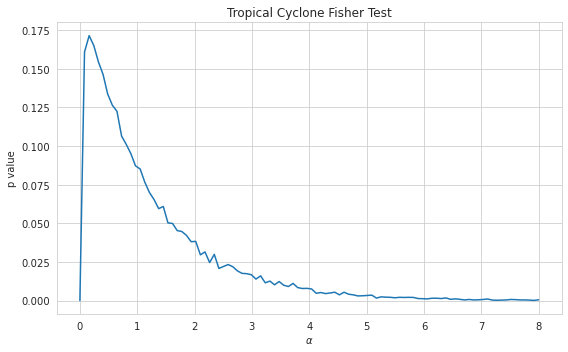

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))

ps.plot()

ax.set_ylabel('p value')
ax.set_xlabel('$\\alpha$')
ax.set_title('Tropical Cyclone Fisher Test')

fig.tight_layout()
fig.show()

### Alpha with prior simu

In [66]:
n_mc_samples = 10000
n = 100
t_threshold = 0.534

alphas = np.linspace(5, 30, 100)
ps = []
for alpha in alphas:
    xs = np.random.poisson(lam=alpha, size=(n_mc_samples, n))
    p = (np.array([test_stat(x) for x in xs]) >= t_threshold).mean()
    ps.append(p)

ps = pd.DataFrame(np.c_[alphas, ps], columns=['alpha','p']).set_index('alpha').p

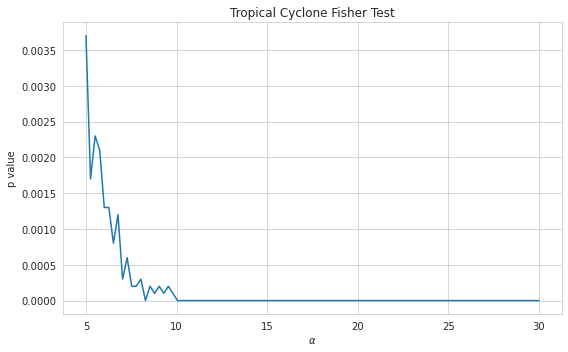

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))

ps.plot()

ax.set_ylabel('p value')
ax.set_xlabel('$\\alpha$')
ax.set_title('Tropical Cyclone Fisher Test')

fig.tight_layout()
fig.show()

In [69]:
ps

alpha
5.000000     0.0037
5.252525     0.0017
5.505051     0.0023
5.757576     0.0021
6.010101     0.0013
              ...  
28.989899    0.0000
29.242424    0.0000
29.494949    0.0000
29.747475    0.0000
30.000000    0.0000
Name: p, Length: 100, dtype: float64

### Plugin p-value

In [72]:
xs = np.random.poisson(lam=8.77, size=(100000, 100))
p = (np.array([test_stat(x) for x in xs]) >= t_threshold).mean()

In [74]:
p

0.00018

### Conditional p-value

In [94]:
(np.array([test_stat(np.random.multinomial(n=877, pvals=np.ones(100)/100)) for i in range(10000)]) > t_threshold).mean()

0.0001